In [123]:
import spacy
import pandas as pd
import numpy as np
from spacy.matcher import Matcher
from spacy.tokens import Span
import nltk
import re
import networkx
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')
nltk. download('punkt')

[nltk_data] Downloading package punkt to /Users/yoonapark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [153]:
datapath = '../data/gHinton.txt'
sents = []
with open(datapath, 'r') as f:
    lines = re.sub('\\[\d*\\]','',f.read())

# Sentence Segmentation
sents = nltk.tokenize.sent_tokenize(lines)
sents = [sent.lower() for sent in sents]

In [139]:
roots = []

for sent in sents:
    print('==============================')
    print(sent)
    doc = nlp(sent)
    
    for token in doc:
        if token.dep_ == 'ROOT':
            roots.append(token)
        print(f'{token.text} >>> {token.dep_}')


geoffrey everest hinton cc frs frsc (born 6 december 1947) is a british-canadian cognitive psychologist and computer scientist, most noted for his work on artificial neural networks.
geoffrey >>> compound
everest >>> compound
hinton >>> compound
cc >>> compound
frs >>> compound
frsc >>> nsubj
( >>> punct
born >>> acl
6 >>> nummod
december >>> npadvmod
1947 >>> nummod
) >>> punct
is >>> ROOT
a >>> det
british >>> amod
- >>> punct
canadian >>> amod
cognitive >>> amod
psychologist >>> nmod
and >>> cc
computer >>> conj
scientist >>> attr
, >>> punct
most >>> advmod
noted >>> advcl
for >>> prep
his >>> poss
work >>> pobj
on >>> prep
artificial >>> amod
neural >>> amod
networks >>> pobj
. >>> punct
since 2013, he has divided his time working for google (google brain) and the university of toronto.
since >>> prep
2013 >>> pobj
, >>> punct
he >>> nsubj
has >>> aux
divided >>> ROOT
his >>> poss
time >>> dobj
working >>> acl
for >>> prep
google >>> pobj
( >>> punct
google >>> compound
brain >>> 

although >>> mark
this >>> det
work >>> nsubj
was >>> advcl
important >>> acomp
in >>> prep
popularizing >>> pcomp
backpropagation >>> dobj
, >>> punct
it >>> nsubj
was >>> ROOT
not >>> neg
the >>> det
first >>> attr
to >>> aux
suggest >>> relcl
the >>> det
approach >>> dobj
. >>> punct
reverse-mode automatic differentiation, of which backpropagation is a special case, was proposed by seppo linnainmaa in 1970, and paul werbos proposed to use it to train neural networks in 1974.
reverse >>> nmod
- >>> punct
mode >>> nmod
automatic >>> amod
differentiation >>> nsubjpass
, >>> punct
of >>> dep
which >>> pobj
backpropagation >>> nsubj
is >>> relcl
a >>> det
special >>> amod
case >>> attr
, >>> punct
was >>> auxpass
proposed >>> ROOT
by >>> agent
seppo >>> amod
linnainmaa >>> pobj
in >>> prep
1970 >>> pobj
, >>> punct
and >>> cc
paul >>> compound
werbos >>> nsubj
proposed >>> conj
to >>> aux
use >>> xcomp
it >>> dobj
to >>> aux
train >>> xcomp
neural >>> amod
networks >>> dobj
in >>> prep
1

hinton >>> nsubj
is >>> ROOT
the >>> det
great >>> advmod
- >>> punct
great >>> amod
- >>> punct
grandson >>> attr
both >>> appos
of >>> prep
mathematician >>> pobj
and >>> cc
educator >>> compound
mary >>> compound
everest >>> compound
boole >>> conj
with >>> prep
logician >>> compound
george >>> compound
boole >>> pobj
, >>> punct
whose >>> poss
work >>> nsubj
eventually >>> advmod
became >>> relcl
one >>> attr
of >>> prep
the >>> det
foundations >>> pobj
of >>> prep
modern >>> amod
computer >>> compound
science >>> pobj
, >>> punct
and >>> cc
of >>> conj
surgeon >>> pobj
and >>> cc
author >>> compound
james >>> compound
hinton >>> conj
who >>> nsubj
was >>> relcl
the >>> det
father >>> attr
of >>> prep
charles >>> compound
howard >>> compound
hinton >>> pobj
. >>> punct
hinton's father was howard hinton.
hinton >>> poss
's >>> case
father >>> nsubj
was >>> ROOT
howard >>> compound
hinton >>> attr
. >>> punct
his middle name comes from another relative, george everest.
his >>> poss
m

In [140]:
for i, root in enumerate(roots):
    print(sents[i])
    print(f'Root: {root.text}')
    for child in root.children:
        print(f'{child.text} >> {child.dep_}')

geoffrey everest hinton cc frs frsc (born 6 december 1947) is a british-canadian cognitive psychologist and computer scientist, most noted for his work on artificial neural networks.
Root: is
frsc >> nsubj
scientist >> attr
, >> punct
noted >> advcl
. >> punct
since 2013, he has divided his time working for google (google brain) and the university of toronto.
Root: divided
since >> prep
, >> punct
he >> nsubj
has >> aux
time >> dobj
and >> cc
university >> conj
. >> punct
in 2017, he co-founded and became the chief scientific advisor of the vector institute in toronto.
Root: co
in >> prep
, >> punct
he >> nsubj
- >> advcl
founded >> advcl
and >> cc
became >> conj
. >> punct
with david rumelhart and ronald j. williams, hinton was co-author of a highly cited paper published in 1986 that popularized the backpropagation algorithm for training multi-layer neural networks, although they were not the first to propose the approach.
Root: was
with >> prep
, >> punct
hinton >> nsubj
co >> attr
-

IndexError: list index out of range

In [141]:
pairs = []

for root in roots:
    source = None
    target = None
    
    for child in root.children:
        if child.dep_.find('sub') == True:
            source = child
        elif child.dep_.find('obj') == True:
            target = child
    
    if source and target:
        s_prefix = ''
        for s_child in source.children:
            if s_child.dep_ == 'compound':
                print(s_child.text)
                s_prefix = " ".join([s_prefix, s_child.text])
              
        t_prefix = ''
        for t_child in target.children:
            if t_child.dep_ == 'compound':
                print(t_child.text)
                t_prefix = " ".join([t_prefix, t_child.text])
                
        source_nm = " ".join([s_prefix, source.text])
        target_nm = " ".join([t_prefix, target.text])
        
        
        pairs.append((source_nm, root.text, target_nm))
            

turing
canada
research
david
e.
backpropagation
learning
research
phd
peter
herzberg
canada
gold
wolfson
clerk
maxwell
foundation


In [142]:
for pair in pairs:
    print(pair)

(' he', 'divided', ' time')
(' hinton', 'received', ' turing award')
(' he', 'continued', ' study')
(' he', 'holds', ' canada research chair')
(' hinton', 'taught', ' course')
(' hinton', 'joined', ' google')
(' research', 'investigates', ' ways')
(' david e. rumelhart', 'applied', ' backpropagation algorithm')
(' contributions', 'include', ' representations')
(' hinton', 'coauthored', ' learning paper')
(' hinton', 'published', ' research papers')
(' phd students', 'include', ' peter dayan')
(' he', 'compared', ' effects')
(' work', 'includes', ' studies')
(' he', 'brings', ' skills')
(' hinton', 'awarded', ' doctorate')
(' he', 'awarded', ' herzberg canada gold medal')
(' hinton', 'awarded', ' doctorate')
(' he', 'received', ' wolfson clerk maxwell award')
(' he', 'won', ' foundation frontiers')
(' hinton', 'won', ' award')
(' he', 'awarded', ' companion')
(' he', 'lost', ' wife')
(' hinton', 'rule', ' beings')


In [144]:
sources = [x[0] for x in pairs]
roots = [x[1] for x in pairs]
targets = [x[2] for x in pairs]

relations_df = pd.DataFrame({"Source":sources, "Root":roots, "Target":targets})

kg=networkx.from_pandas_edgelist(relations_df, "Source", "Target", 
                          edge_attr=True, create_using=networkx.MultiDiGraph())

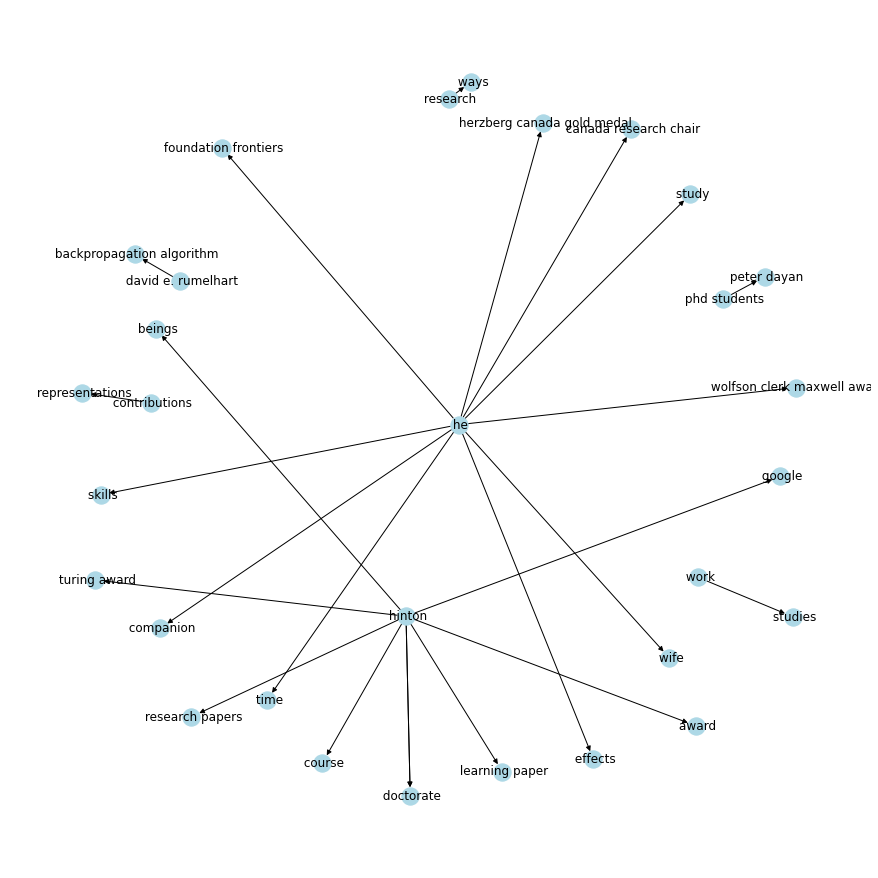

In [152]:
plt.figure(figsize=(12,12))

pos = networkx.spring_layout(kg)
networkx.draw(kg, with_labels=True, node_color='lightblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()